In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# csv 파일을 로딩
df = pd.read_csv("../data/ozone/ozone2.csv")
df.head()

,Ozone,Result,Solar.R,Wind,Temp,Month,Day
0,41.00000,0,190.000000,7.4,67,5,1
1,36.00000,0,118.000000,8.0,72,5,2
2,12.00000,0,149.000000,12.6,74,5,3
3,18.00000,0,313.000000,11.5,62,5,4
4,42.12931,1,185.931507,14.3,56,5,5


In [2]:
df['Result'].value_counts()

1    81
0    72
Name: Result, dtype: int64

In [3]:
cols = ['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']

array([[<AxesSubplot:xlabel='Ozone', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Result', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Solar.R', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Wind', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Temp', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Month', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Day', ylabel='Ozone'>],
       [<AxesSubplot:xlabel='Ozone', ylabel='Result'>,
        <AxesSubplot:xlabel='Result', ylabel='Result'>,
        <AxesSubplot:xlabel='Solar.R', ylabel='Result'>,
        <AxesSubplot:xlabel='Wind', ylabel='Result'>,
        <AxesSubplot:xlabel='Temp', ylabel='Result'>,
        <AxesSubplot:xlabel='Month', ylabel='Result'>,
        <AxesSubplot:xlabel='Day', ylabel='Result'>],
       [<AxesSubplot:xlabel='Ozone', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Result', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Solar.R', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Wind', ylabel='Solar.R'>,
        <Ax

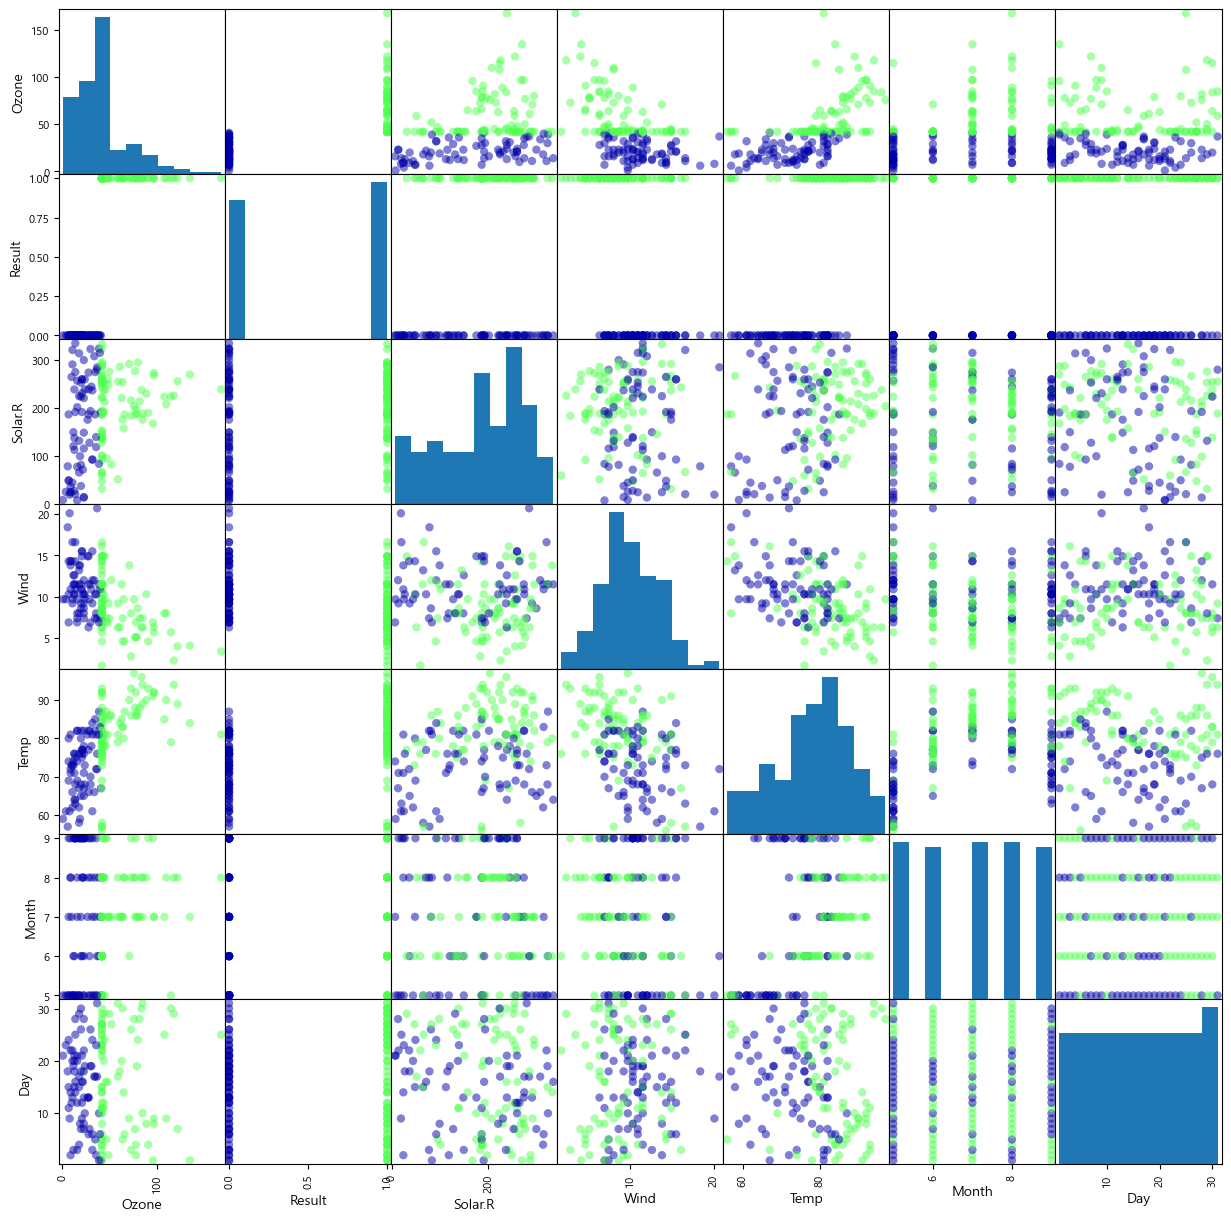

In [4]:
import mglearn
pd.plotting.scatter_matrix(df, c=y, figsize=(15, 15), marker='o', cmap=mglearn.cm3)

In [5]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp["Result"].value_counts()

0    72
1    72
Name: Result, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [7]:
from sklearn.svm import SVC
model = SVC(random_state=10)
model.fit(X_train, y_train)

SVC(random_state=10)

In [8]:
import numpy as np
pred=model.predict(X_test)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))
print("검증용:",np.mean(pred == y_test))
# 과적합 발생

학습용: 0.6475409836065574
검증용: 0.6451612903225806
검증용: 0.6451612903225806


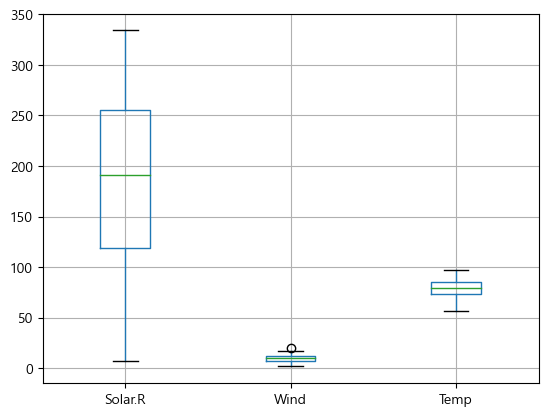

In [9]:
X_train.boxplot()
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = pd.DataFrame(ss.transform(X_train))
X_test_scaled = pd.DataFrame(ss.transform(X_test))

c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


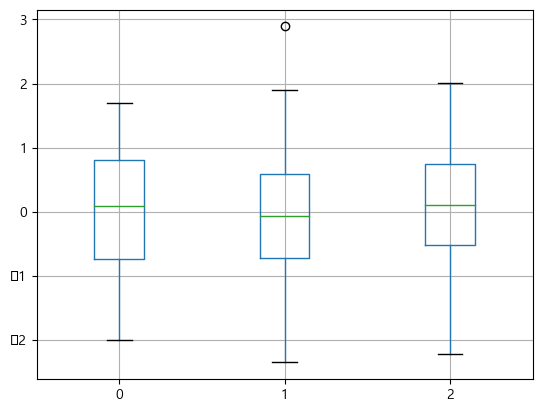

In [11]:
X_train_scaled.boxplot()
plt.show()

In [12]:
model = SVC(random_state=10)
model.fit(X_train_scaled, y_train)
print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))
# 예측률이 개선됨

학습용: 0.7786885245901639
검증용: 0.7741935483870968


In [13]:
# 최적의 C value와 gamma value를 찾는 과정
# 최적의 C value
# C값을 증가시키면 모델이 좀더 복잡해짐(좀더 자세하게 결정경계를 찾아내는 방식)
# C값이 작으면 이상치들이 있을 가능성을 크게 잡아서 일반적인 결정 경계를 만들어낸다.
# 최적의 gamma value
# gamma값을 증가시키면 각각의 데이터 포인트가 영향력을 행사하는 거리가 짧아지고
# gamma값이 작으면 영향력을 행사하는 거리가 길어진다.
# 너무 크면 과대적합의 위험이 있고 너무 작으면 과소적합의 위험이 있음
import numpy as np
train_rate = []
test_rate = []
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
g_values = [0.0001, 0.001, 0.01, 0.1]
for n in c_values:
    for g in g_values:
        # 모델 생성
        model = SVC(C=n,gamma=g,random_state=10)
        model.fit(X_train_scaled, y_train)
        # 학습용 데이터셋의 정확도
        train_rate.append([n,g,model.score(X_train_scaled, y_train)])
        # 검증용 데이터셋의 정확도
        test_rate.append([n,g,model.score(X_test_scaled, y_test)])
        
train_arr=np.array(train_rate) # 검증용 데이터셋의 정확도
test_arr=np.array(test_rate) # 검증용 데이터셋의 정확도
max_rate=np.max(test_arr[:,2]) # 가장 좋은 정확도
idx=np.where(test_arr[:,2] == max_rate)[0][0] # 가장 성능이 좋은 인덱스
print("최적의 c:",test_rate[idx][0])
print("최적의 gamma:",test_rate[idx][1])
print("최적의 정확도:",test_rate[idx][2])

최적의 c: 100
최적의 gamma: 0.01
최적의 정확도: 0.8064516129032258


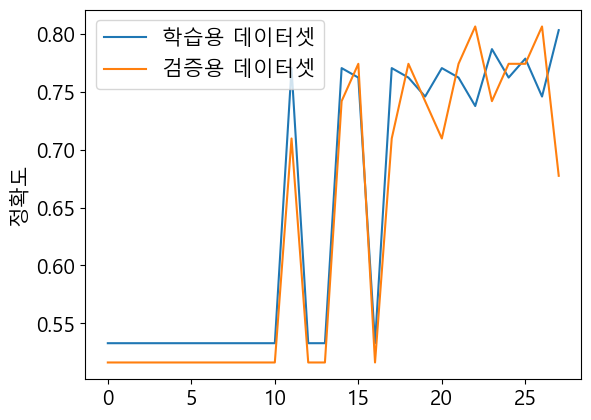

In [14]:
plt.rcParams["font.size"]=15
plt.plot(range(len(train_rate)), train_arr[:,2], label="학습용 데이터셋")
plt.plot(range(len(test_rate)), test_arr[:,2], label="검증용 데이터셋")
plt.ylabel("정확도")
plt.legend()

In [15]:
# 최적의 C, gamma value를 적용한 모형
model = SVC(C=100,gamma=0.01,random_state=10)
model.fit(X_train_scaled, y_train)
print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))
# 예측률이 개선됨

학습용: 0.7377049180327869
검증용: 0.8064516129032258


In [16]:
# confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test_scaled)
confusion_matrix(y_test, pred)

array([[12,  3],
       [ 3, 13]], dtype=int64)